In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle as pkl
import torch
from pipeline import load_index_paths

In [2]:
prot_dataframe_path = Path("~/CellCyclePlottingDataframes/ProteinPseudotimePlotting.csv")
DATA_DIR = Path('/data/ishang/HPA-CC-dataset/')
NAME = "512_min_max"
img_dataframe_path = Path("~/HPA-embedding/ifimages_v23.csv")

In [3]:
FUCCI_DATA_DIR = Path('/data/ishang/FUCCI-dataset-well/')
FUCCI_NAME = "unnormalize_1250_sharp_512_crop_og_res"
# checkpoint_hash = "24jh7g80" # model trained on tile and chamber
# checkpoint_hash = "222lb9ox" # model trained on just sp8
checkpoint_hash = "wwzdewqp" # model trained on just sp8 and clean sp5

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
[0.   0.11 0.22 0.36 0.5  0.64 0.7  0.76 0.83 0.92 1.  ]


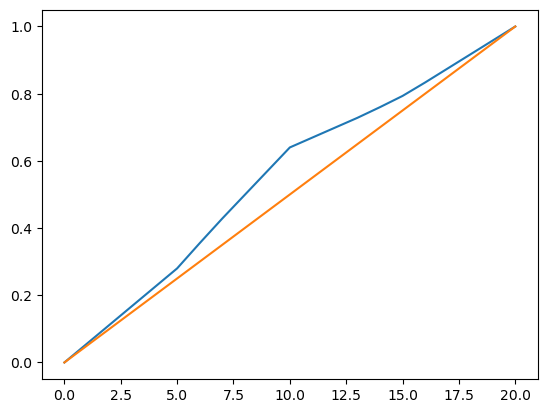

In [48]:
def normalized_to_cc_paper(ps):
    normalized = [0, 0.25, 0.33, 0.5, 0.67, 0.76, 1.0]
    hpa = [0, 0.28, 0.40, 0.64, 0.74, 0.80, 1.0]
    return np.interp(ps, normalized, hpa)

np.set_printoptions(precision=2)
print(np.linspace(0, 1, 11))
print(normalized_to_cc_paper(np.linspace(0, 1, 11)))
plt.plot(normalized_to_cc_paper(np.linspace(0, 1, 21)))
plt.plot(np.linspace(0, 1, 21))

# Get Joint DF of the Proteogenomic Data and HPAv23

In [5]:
prot_df = pd.read_csv(prot_dataframe_path, sep="\t")
prot_df.head()

,ENSG,Antibody,Compartment,CCD,cell_pseudotime,cell_intensity,cell_fred,cell_fgreen,mvavg_x,mvavg_y,mvavgs_10p,mvavgs_90p,mvavgs_25p,mvavgs_75p,phase,gini,percent_variance,WellPlate
0,ENSG00000158321,HPA000390,Nuc,Pseudotime,"0.985,0.98,0.958,0.956,0.939,0.918,0.906,0.886...","0.7390379271165064,0.26638857293726376,0.23516...","-0.3367071628231325,-0.2537370752453728,-0.327...","0.16949821761323114,0.15437852625202098,0.2811...","0.9273,0.9158999999999999,0.9047000000000001,0...","0.5159648053986967,0.4660035371680031,0.466981...","0.23422860850573798,0.23422860850573798,0.2342...","0.7100372240546419,0.6975376607329703,0.697537...","0.27670764279798576,0.24616607684149372,0.2486...","0.6955110140225208,0.6840873393518287,0.684087...","G1,G1,G1,G1,G1,G1,G1,G1,G1,G1,G1,G1,G1,G1,G1,G...",0.259460,0.075247,A01_55185977
1,ENSG00000136108,HPA008410,Cell,No,"0.999,0.999,0.999,0.999,0.998,0.997,0.996,0.99...","0.51376959183985,0.7405869142211623,0.81868294...","-0.3725437022652657,-0.6231683707284121,-0.549...","-0.23242950472018076,-0.31747863894368267,-0.1...","0.9970000000000001,0.9964000000000002,0.9956,0...","0.6817120990446968,0.6867546091391149,0.679389...","0.4806172070165337,0.5259997978662968,0.525999...","0.9654769367216557,0.9654769367216557,0.965476...","0.5686379490285043,0.5686379490285043,0.568637...","0.8439480208343555,0.8439480208343555,0.843948...","G1,G1,G1,G1,G1,G1,G1,G1,G2,G1,G1,G1,G1,G1,G1,G...",0.263932,0.162583,A01_55195978
2,ENSG00000138347,HPA036299,Nuc,No,"0.994,0.988,0.987,0.983,0.983,0.983,0.981,0.97...","0.4375524453497077,0.379598311989224,0.4250342...","-0.6154224138635805,-0.5262924859426088,-0.561...","0.13745277197115247,0.2372470014436192,0.26784...","0.9833,0.9809,0.9788,0.9768,0.9749000000000001...","0.4582648704273652,0.47214338563201247,0.47211...","0.3781681674751873,0.3781681674751873,0.377899...","0.5849546992393218,0.5883825809816025,0.588382...","0.39167250785765256,0.39167250785765256,0.3916...","0.4577311068262303,0.545106306371072,0.5451063...","G1,G1,G1,G1,G1,G1,G1,G1,G1,G1,G1,G1,G1,G1,G1,G...",0.128947,0.169056,A01_55215982
3,ENSG00000111605,HPA039973,Nuc,No,"0.996,0.99,0.977,0.976,0.976,0.975,0.97,0.97,0...","0.8101348993256068,0.6795541246218457,0.522480...","-0.3639438962224717,-0.5128467733879262,-0.568...","0.01976830044182032,0.1974365965385232,0.36987...","0.9764,0.9727,0.9694,0.9672000000000001,0.9646...","0.6465866833930525,0.6238660102519809,0.603861...","0.5282544974850903,0.5282544974850903,0.518182...","0.7934222794495805,0.7166186783702061,0.716618...","0.5606609988735599,0.5605516964028059,0.534945...","0.7011069863235018,0.6724617441088006,0.647713...","G1,G1,G1,G1,G1,G1,G1,G1,G1,G1,G1,G1,G1,G1,G1,G...",0.091280,0.109277,A01_55225983
4,ENSG00000106012,HPA019515,Nuc,Pseudotime,"0.989,0.984,0.982,0.978,0.971,0.967,0.952,0.94...","0.5969635594559007,0.5025506437395802,0.051360...","-0.4479913643858908,-0.413693784511982,-0.2077...","0.18321627760853776,0.21965267249632658,0.1187...","0.9633999999999999,0.9565,0.9501000000000001,0...","0.5187417333868999,0.5001823582743513,0.523089...","0.38392780352238387,0.37536885280545856,0.3753...","0.6456019456179166,0.6456019456179166,0.742913...","0.4878897119154546,0.4367612392326159,0.436761...","0.6087973121769674,0.5975933084128137,0.620809...","G1,G1,G1,G1,G1,G1,G1,G1,G1,G1,G1,G1,G1,G1,G1,G...",0.182334,0.560001,A01_55235979


In [6]:
img_df = pd.read_csv(img_dataframe_path)
cell_line_rows = img_df["atlas_name"].isin(["U2OS"])
img_df = img_df[cell_line_rows][["filename", "jpg_prefix", "ensembl_ids", "if_plate_id", "position", "sample", "gene_names",
                       "locations", "antibody"]]
img_df = img_df.rename(columns={"ensembl_ids": "ENSG", "antibody": "Antibody"})
img_df.head()

,filename,jpg_prefix,ENSG,if_plate_id,position,sample,gene_names,locations,Antibody
0,/archive/1/1_A1_1_,https://lims.proteinatlas.org/images/992/1_A1_1_,ENSG00000066455,1,A1,1,GOLGA5,Golgi apparatus,HPA000992
1,/archive/1/1_A1_2_,https://lims.proteinatlas.org/images/992/1_A1_2_,ENSG00000066455,1,A1,2,GOLGA5,Golgi apparatus,HPA000992
2,/archive/1/1_A3_1_,https://lims.proteinatlas.org/images/2899/1_A3_1_,ENSG00000183092,1,A3,1,BEGAIN,"Cytosol,Nucleoplasm",HPA002899
3,/archive/1/1_A3_2_,https://lims.proteinatlas.org/images/2899/1_A3_2_,ENSG00000183092,1,A3,2,BEGAIN,"Cytosol,Nucleoplasm",HPA002899
4,/archive/1/1_A6_1_,https://lims.proteinatlas.org/images/609/1_A6_1_,ENSG00000102119,1,A6,1,EMD,"Endoplasmic reticulum,Nuclear membrane",HPA000609


In [7]:
# join the dataframes on ENSG and Antibody
df = prot_df.merge(img_df, on=["ENSG", "Antibody"])
print(len(df), len(prot_df), len(img_df))
print(len(df["ENSG"].unique()), len(prot_df["ENSG"].unique()), len(img_df["ENSG"].unique()))

2130 1166 27560
1067 1166 11381


# CC Paper Figure Info Collected Manually

In [8]:
cc_paper_prot_ant = {
    "DUSP19": ["HPA021501"],
    "DUSP18": ["HPA051349"],
    "PAPSS1": ["HPA049781"],
    "N6AMT1": ["HPA059242"],
    # "PHLDB1": [""],
    # "FLI1": [""],
    # "TTC21B": [""],
    "PC": ["HPA043922"],
    "UGDH": ["HPA036656"],
    "ORC6": ["HPA072587"],
    "ZNF32": ["HPA039148"],
    "CCNE1": ["HPA018169"],
    "CCNB1": ["HPA051349"],
    "AURKB": ["HPA037708"],
    "BUB1B": ["HPA008419"],
    "DPH2": ["HPA045796"],
    "GMNN": ["HPA054597"],
    # "CDT1": [""],
    "ANLN": ["HPA050556"],
}

cc_paper_prot_peaks = {
    "DUSP19": 0.4,
    "DUSP18": 0.8,
    "PAPSS1": 0.9,
    "N6AMT1": 0.8,
    # "PHLDB1": 
    # "FLI1": 
    # "TTC21B": 
    "PC": 0.8,
    "UGDH": 0.8,
    "ORC6": 0.4,
    "ZNF32": 0.2,
    "CCNE1": 0.4,
    "CCNB1": 0.9,
    "AURKB": 0.8,
    "BUB1B": 0.8,
    "DPH2": 0.9,
    "GMNN": 0.8,
    # "CDT1": 
    "ANLN": 0.8
}

cc_paper_prot_loc = {
    "DUSP19": "nuc",
    "DUSP18": "nuc",
    "PAPSS1": "nuc",
    "N6AMT1": "nuc",
    "PHLDB1": "nuc",
    "FLI1": "nuc",
    "TTC21B": "cell",
    "PC": "cell",
    "UGDH": "nuc",
    "ORC6": "nuc",
    "ZNF32": "nuc",
    "CCNE1": "nuc",
    "CCNB1": "cyto",
    "AURKB": "nuc",
    "BUB1B": "cyto",
    "DPH2": "nuc",
    "GMNN": "nuc",
    "CDT1": "nuc",
    "ANLN": "nuc",
}

paper_df = df[df["Antibody"].isin([antibody for antibodies in cc_paper_prot_ant.values() for antibody in antibodies])]

In [9]:
paper_df.head()

,ENSG,Antibody,Compartment,CCD,cell_pseudotime,cell_intensity,cell_fred,cell_fgreen,mvavg_x,mvavg_y,...,gini,percent_variance,WellPlate,filename,jpg_prefix,if_plate_id,position,sample,gene_names,locations
36,ENSG00000167065,HPA051349,Nuc,Pseudotime,"0.988,0.972,0.967,0.967,0.953,0.941,0.923,0.91...","0.4134538534404906,0.45366697029678893,0.43499...","-0.5208085575661376,-0.3696105952531643,-0.338...","0.22678169629288636,0.2645050769582622,0.26161...","0.9421,0.9316000000000001,0.9226000000000001,0...","0.5922156625516153,0.6318749547579287,0.676801...",...,0.482745,0.939377,A02_55355986,/archive/795/795_H7_1_,https://lims.proteinatlas.org/images/51349/795...,795,H7,1,DUSP18,Nucleoplasm
37,ENSG00000167065,HPA051349,Nuc,Pseudotime,"0.988,0.972,0.967,0.967,0.953,0.941,0.923,0.91...","0.4134538534404906,0.45366697029678893,0.43499...","-0.5208085575661376,-0.3696105952531643,-0.338...","0.22678169629288636,0.2645050769582622,0.26161...","0.9421,0.9316000000000001,0.9226000000000001,0...","0.5922156625516153,0.6318749547579287,0.676801...",...,0.482745,0.939377,A02_55355986,/archive/795/795_H7_2_,https://lims.proteinatlas.org/images/51349/795...,795,H7,2,DUSP18,Nucleoplasm
274,ENSG00000156970,HPA008419,Cyto,Pseudotime,"0.999,0.984,0.983,0.978,0.974,0.974,0.974,0.97...","0.17326443033946182,0.6303113805099895,0.62153...","-0.134352325653738,-0.37286010341540277,-0.504...","-0.06449427649894401,0.19950917799615175,0.280...","0.9748999999999999,0.9701,0.9662,0.96229999999...","0.4551160076588945,0.509447371984444,0.4777461...",...,0.160835,0.363113,B01_55195978,/archive/91/91_H6_1_,https://lims.proteinatlas.org/images/8419/91_H...,91,H6,1,BUB1B,Cytosol
275,ENSG00000156970,HPA008419,Cyto,Pseudotime,"0.999,0.984,0.983,0.978,0.974,0.974,0.974,0.97...","0.17326443033946182,0.6303113805099895,0.62153...","-0.134352325653738,-0.37286010341540277,-0.504...","-0.06449427649894401,0.19950917799615175,0.280...","0.9748999999999999,0.9701,0.9662,0.96229999999...","0.4551160076588945,0.509447371984444,0.4777461...",...,0.160835,0.363113,B01_55195978,/archive/91/91_H6_2_,https://lims.proteinatlas.org/images/8419/91_H...,91,H6,2,BUB1B,Cytosol
344,ENSG00000156239,HPA059242,Nuc,Pseudotime,"0.992,0.989,0.981,0.978,0.977,0.969,0.963,0.96...","0.2599681207682761,0.27029660059301985,0.26953...","-0.5891001591429992,-0.49526136007579785,-0.55...","0.179785167949994,0.199725197364937,0.32762101...","0.9725,0.9689,0.9651,0.962,0.9591999999999999,...","0.3104663140823214,0.31850553139024407,0.34715...",...,0.190908,0.489392,B03_55375988,/archive/1006/1006_A5_3_,https://lims.proteinatlas.org/images/59242/100...,1006,A5,3,N6AMT1,"Centrosome,Nucleoplasm"


# CC Paper Model Comparison

In [10]:
# from the hpa_cc notebook TODO: move these calculations to utils and just manage caching/loading there 
prot_img_stats = pkl.load(open(DATA_DIR / f"prot_img_stats_{checkpoint_hash}.pkl", "rb"))

6546 893


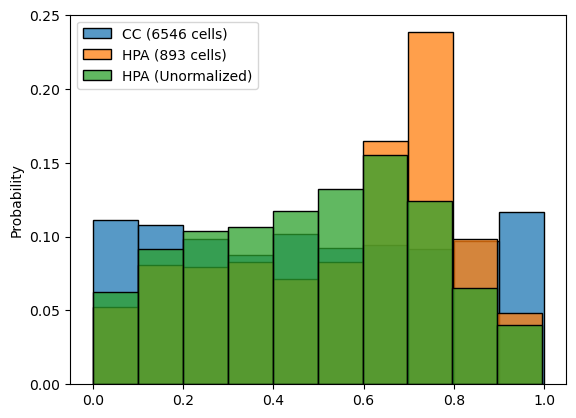

In [49]:
# concatenate lists of cell_pseudotime for each row and plot as histogram
pseudotimes = []
for i in paper_df.index:
    ps_list = [float(t) for t in paper_df["cell_pseudotime"][i].split(",")]
    pseudotimes.extend(ps_list)
cc_pseudotimes = np.array(pseudotimes)

pseudotimes = []
for (gene_name, antibody), img_stats in prot_img_stats.items():
    pseudotimes.extend(img_stats["pseudotime"])
hpa_pseudotimes = np.array(pseudotimes)

print(len(cc_pseudotimes), len(hpa_pseudotimes))

sns.histplot(cc_pseudotimes, bins=10, stat="probability", label=f"CC ({len(cc_pseudotimes)} cells)")
sns.histplot(normalized_to_cc_paper(hpa_pseudotimes), bins=10, stat="probability", label=f"HPA ({len(hpa_pseudotimes)} cells)")
sns.histplot(hpa_pseudotimes, bins=10, stat="probability", label=f"HPA (Unormalized)")
plt.legend()

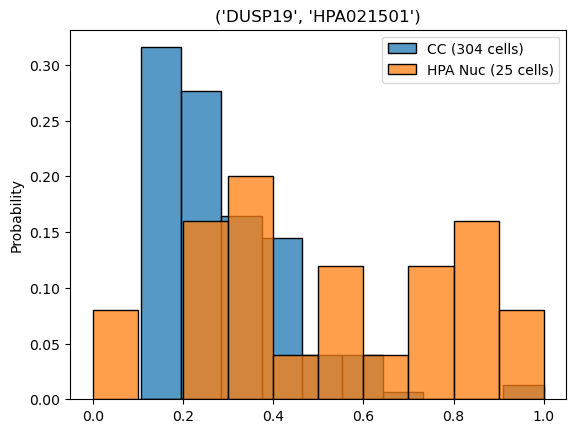

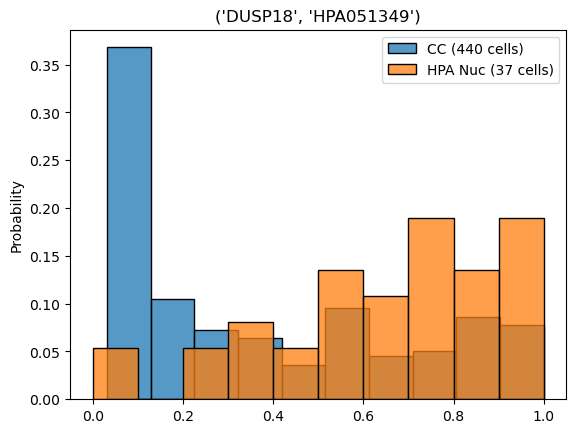

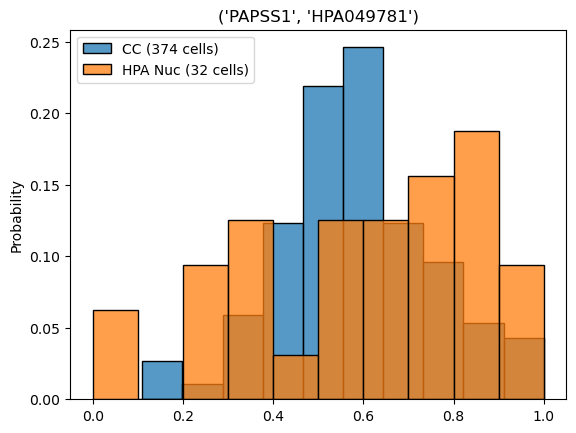

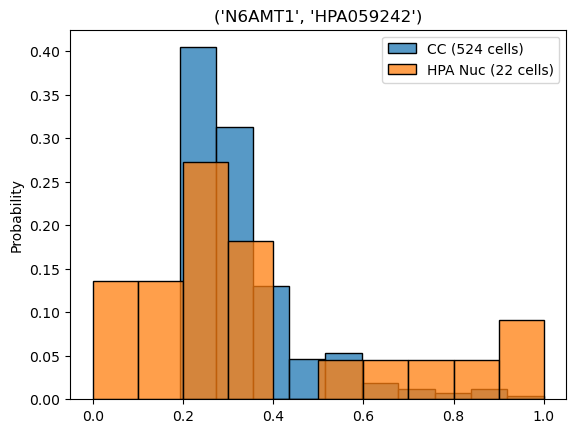

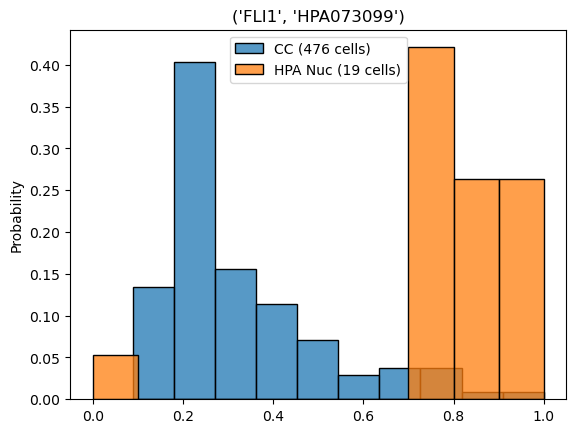

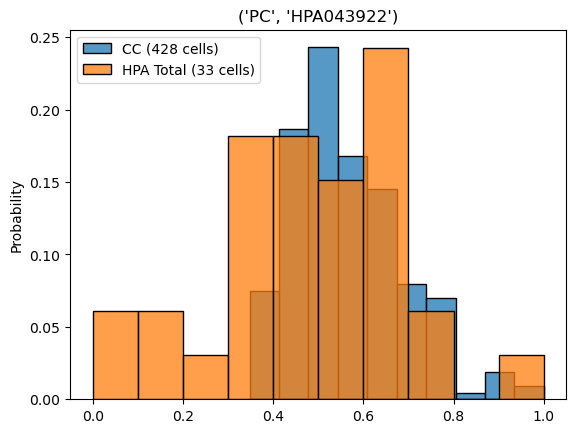

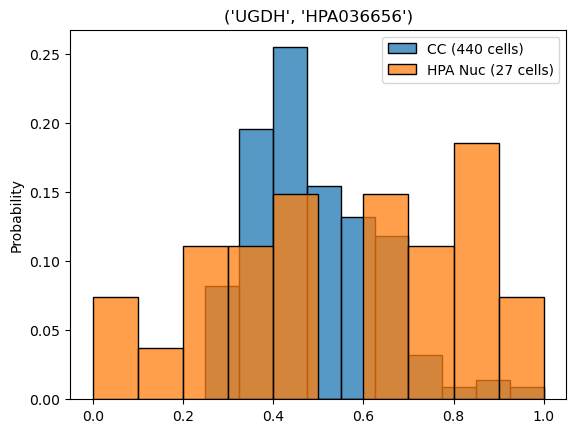

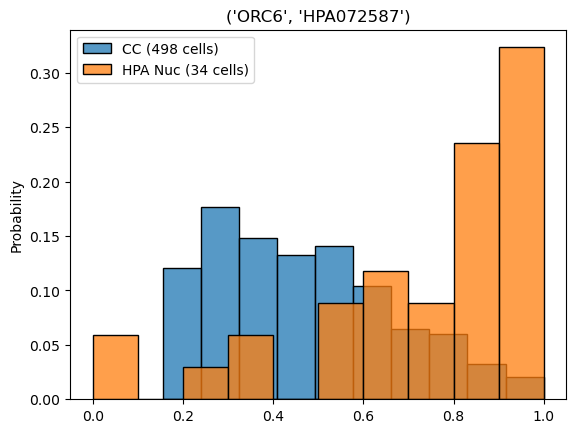

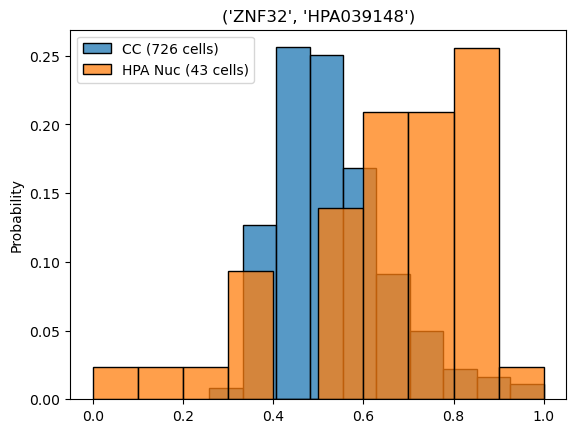

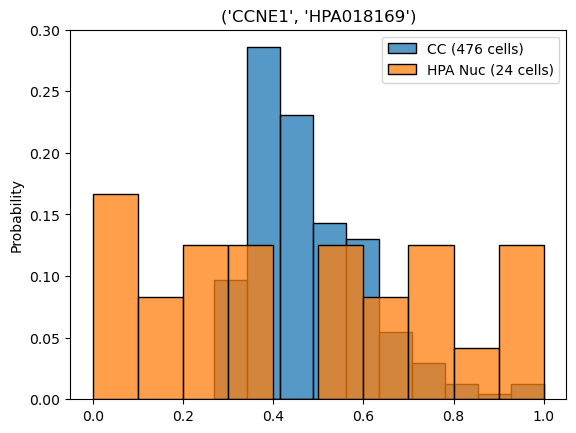

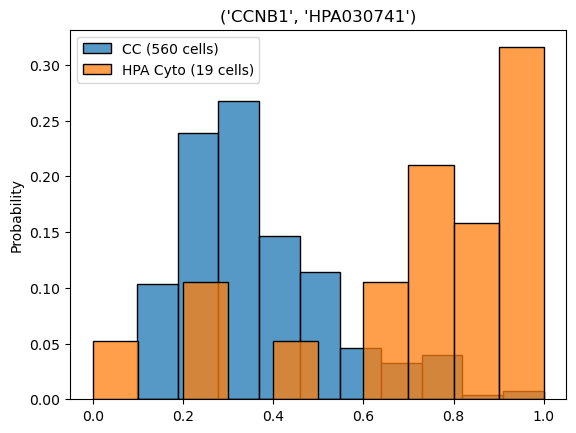

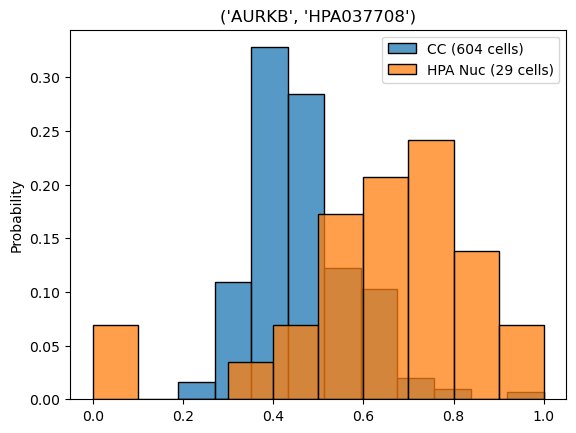

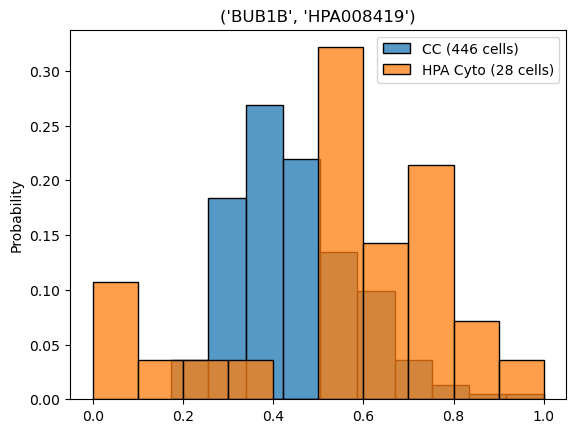

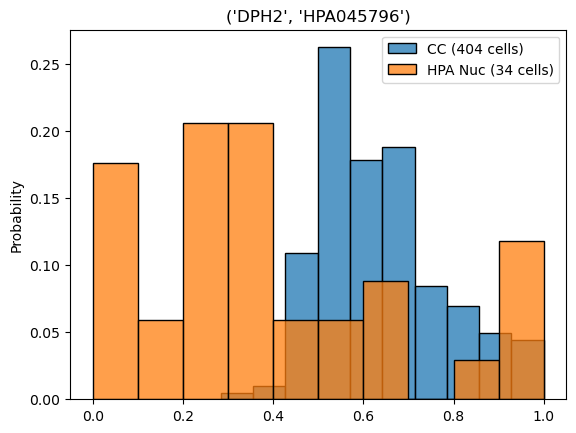

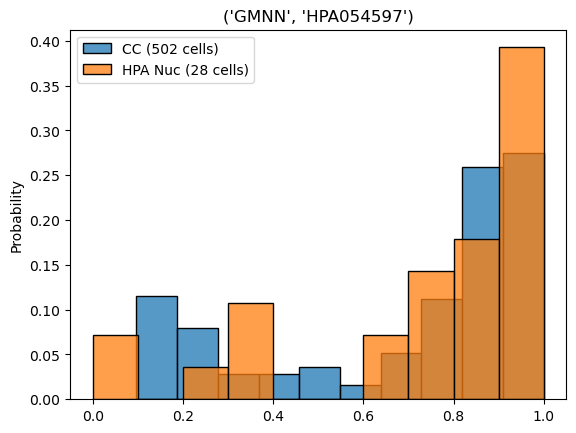

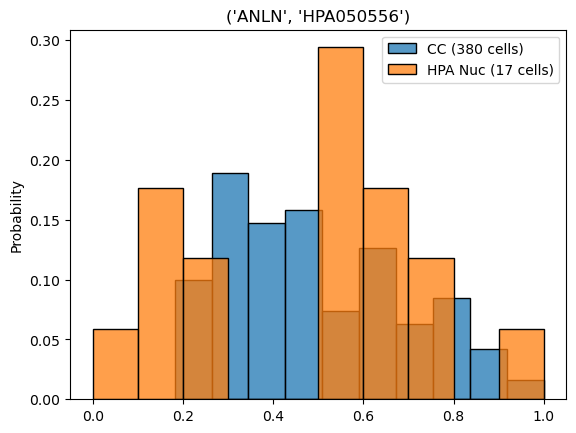

In [67]:
# make a histogram of cell_intensity for each protein, antibody pair
for (gene_name, antibody), img_stats in prot_img_stats.items():
    gene_df = df[(df["gene_names"] == gene_name) & (df["Antibody"] == antibody)]
    if len(gene_df) == 0:
        continue

    cc_intensities = []
    for i in gene_df.index:
        row_intensities = gene_df["cell_intensity"][i]
        intensity_list = [float(t) for t in row_intensities.split(",")]
        cc_intensities.extend(intensity_list)
    cc_intensities = np.array(cc_intensities)

    hpa_intensities = {int_type: np.array(prot_img_stats[(gene_name, antibody)][int_type]) for int_type in prot_img_stats[(gene_name, antibody)].keys() if int_type != "pseudotime"}
    hpa_intensities = {int_type: (intensity - intensity.min()) / (intensity.max() - intensity.min()) for int_type, intensity in hpa_intensities.items()}

    plt.clf()
    sns.histplot(cc_intensities, bins=10, stat="probability", label=f"CC ({len(cc_intensities)} cells)")
    if cc_paper_prot_loc[gene_name] == "cell":
        sns.histplot(hpa_intensities["log_mean_intensity"], bins=10, stat="probability", label=f"HPA Total ({len(hpa_intensities['log_mean_intensity'])} cells)")
    elif cc_paper_prot_loc[gene_name] == "nuc":
        sns.histplot(hpa_intensities["nuc_log_mean_intensity"], bins=10, stat="probability", label=f"HPA Nuc ({len(hpa_intensities['nuc_log_mean_intensity'])} cells)")
    elif cc_paper_prot_loc[gene_name] == "cyto":
        sns.histplot(hpa_intensities["cyto_log_mean_intensity"], bins=10, stat="probability", label=f"HPA Cyto ({len(hpa_intensities['cyto_log_mean_intensity'])} cells)")
    plt.legend()
    plt.title((gene_name, antibody))
    plt.show()

# do the same thing as above but place all the figures into a grid


25
[(25,), (25,), (25,)]


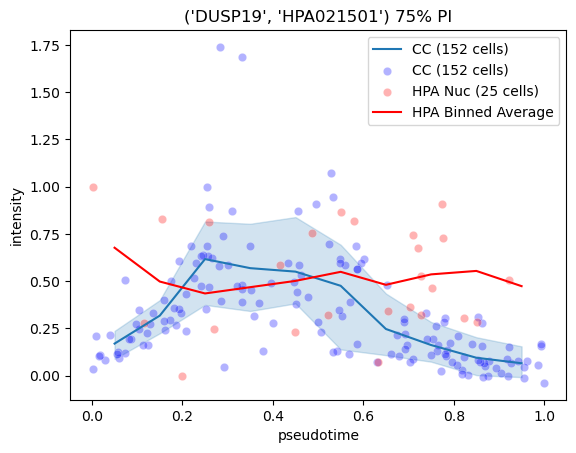

37
[(37,), (37,), (37,)]


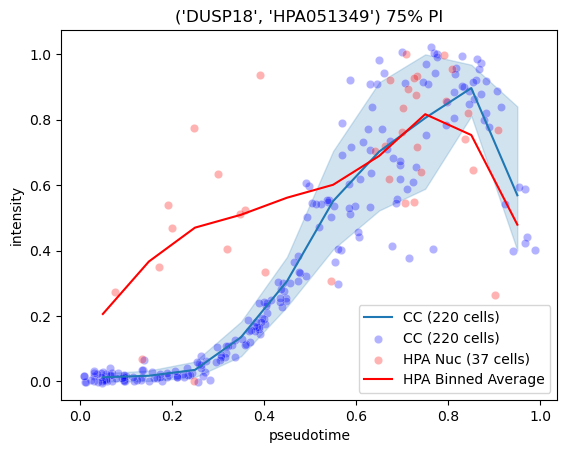

32
[(32,), (32,), (32,)]


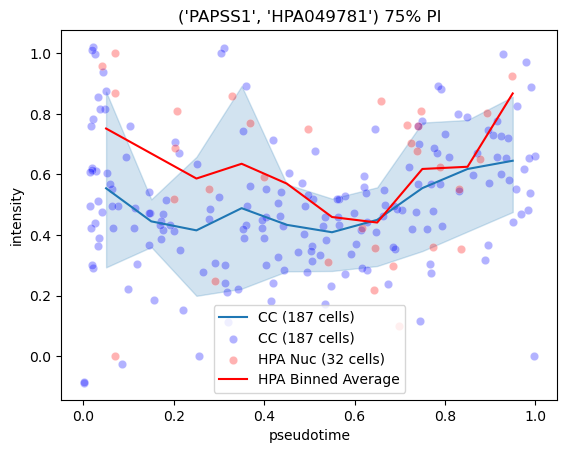

22
[(22,), (22,), (22,)]


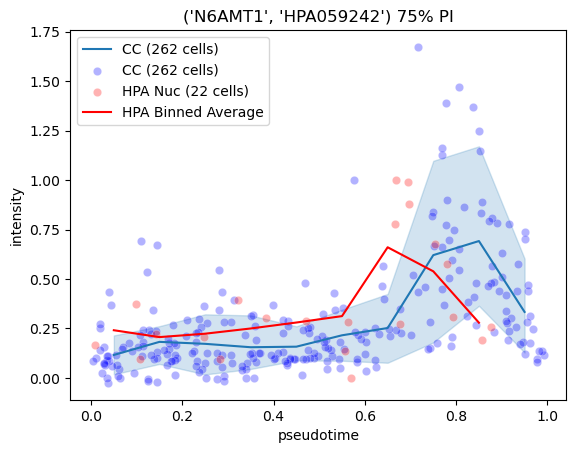

33
[(33,), (33,), (33,)]


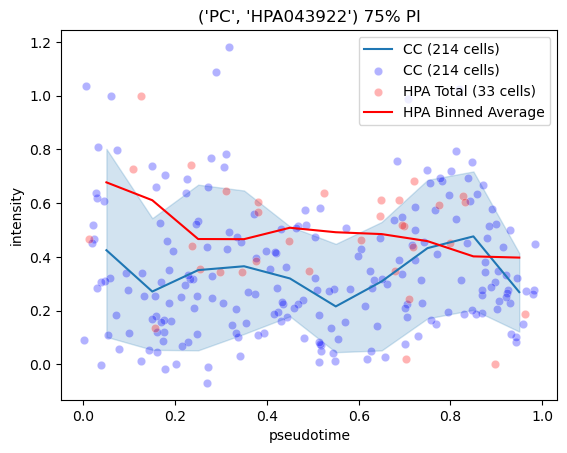

27
[(27,), (27,), (27,)]


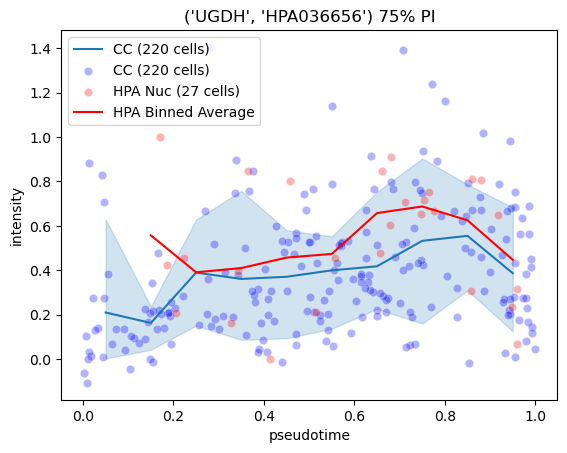

34
[(34,), (34,), (34,)]


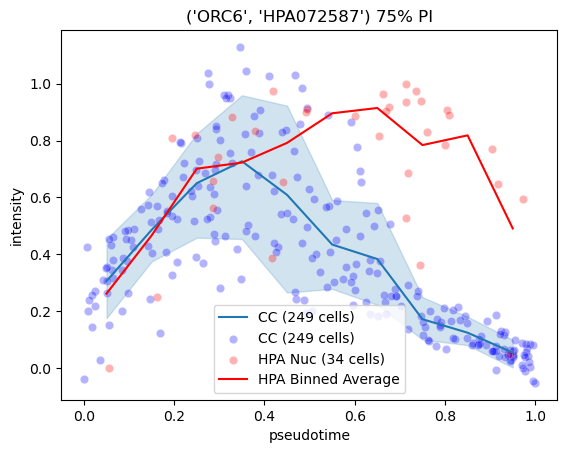

43
[(43,), (43,), (43,)]


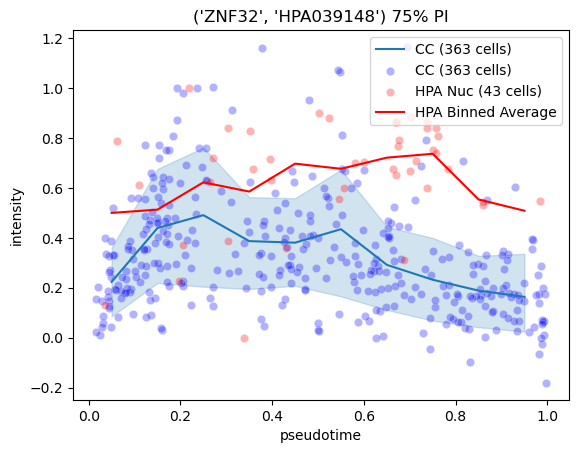

24
[(24,), (24,), (24,)]


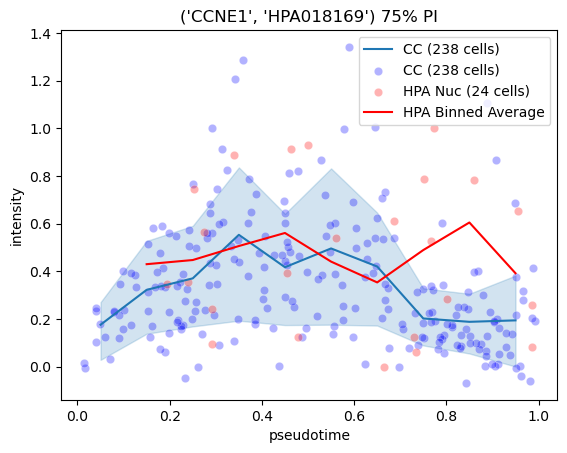

29
[(29,), (29,), (29,)]


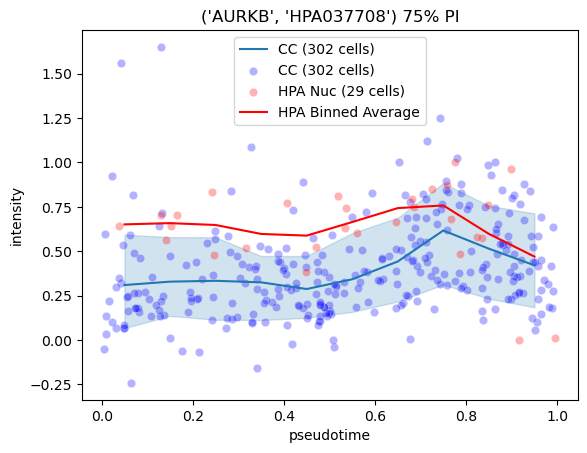

28
[(28,), (28,), (28,)]


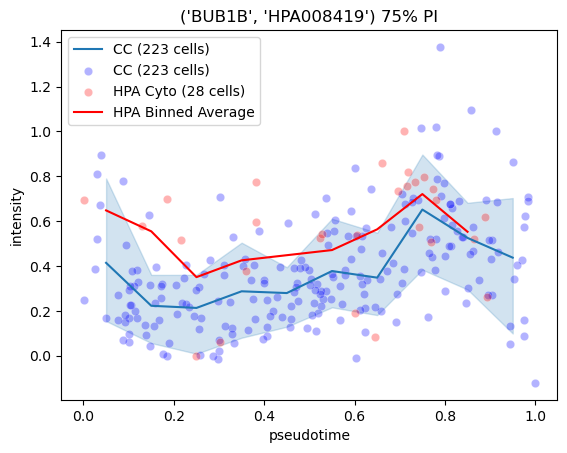

34
[(34,), (34,), (34,)]


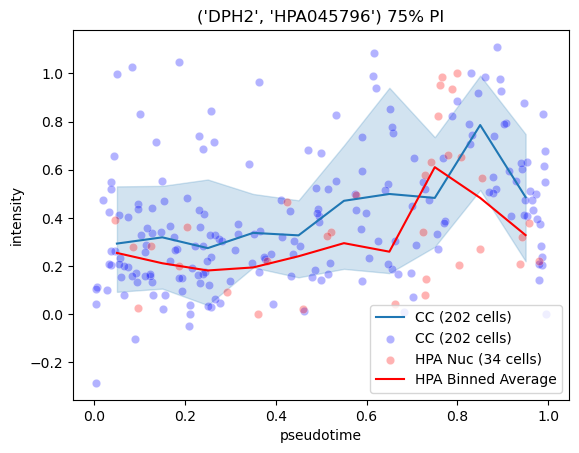

28
[(28,), (28,), (28,)]


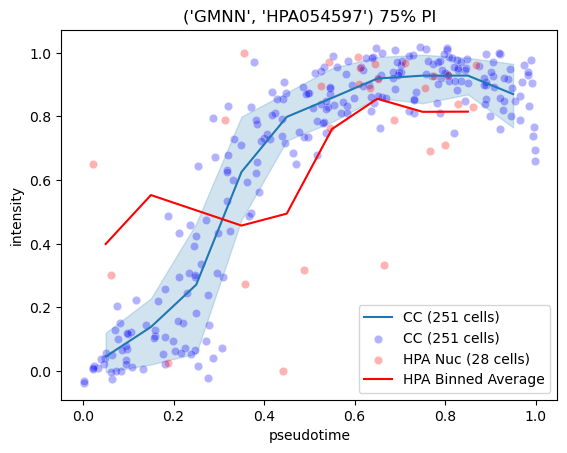

17
[(17,), (17,), (17,)]


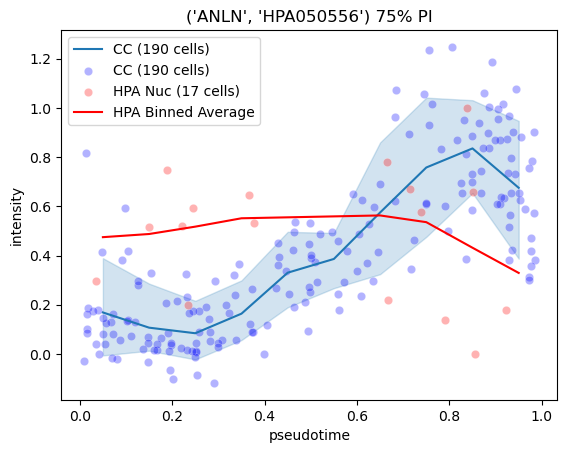

In [57]:
# make a histogram of intensity vs pseudotime for each protein, antibody pair
ci = False
interval = 75
# mov_num = 5
alpha = 0.3

def bin_pseudotime(ps, bin_ct=10):
    bins = np.linspace(0, 1, bin_ct + 1)
    binned = np.digitize(ps, bins) - 1
    binned_val = binned / bin_ct
    binned_centered = binned_val + (1 / (2 * bin_ct))
    return binned_centered


def sampling_renorm(intensity, sample_size, num_samples=int(100 / (100 - interval))):
    mins, maxes = [], []
    for _ in range(num_samples):
        sample = np.random.choice(intensity, sample_size)
        mins.append(sample.min())
        maxes.append(sample.max())
    med_min, med_max = np.median(mins), np.median(maxes)
    # med_min, med_max = np.max(mins), np.min(maxes)
    return (intensity - med_min) / (med_max - med_min)

for (gene_name, antibody), img_stats in prot_img_stats.items():
    gene_df = paper_df[(paper_df["gene_names"] == gene_name) & (paper_df["Antibody"] == antibody)]
    if len(gene_df) == 0:
        continue

    cc_pseudotimes = []
    row_intensities = gene_df["cell_intensity"].iloc[0] # the proteogenomics data entry will be duplicated for the two images
    row_pseudotimes = gene_df["cell_pseudotime"].iloc[0] # the proteogenomics data entry will be duplicated for the two images
    cc_intensities = np.array([float(t) for t in row_intensities.split(",")])
    cc_pseudotimes = np.array([float(t) for t in row_pseudotimes.split(",")])

    hpa_intensities = {
        int_type: np.array(prot_img_stats[(gene_name, antibody)][int_type]) 
        for int_type in prot_img_stats[(gene_name, antibody)].keys() if int_type != "pseudotime"
    }
    hpa_intensities = {
        int_type: (intensity - intensity.min()) / (intensity.max() - intensity.min())
        for int_type, intensity in hpa_intensities.items()
    }
    hpa_pseudotime = np.array(prot_img_stats[(gene_name, antibody)]["pseudotime"])
    print(len(hpa_pseudotime))
    print([intensity.shape for intensity in hpa_intensities.values()])

    binned_cc_pseudotimes = bin_pseudotime(cc_pseudotimes, bin_ct=10)
    cc_intensities = sampling_renorm(cc_intensities, len(hpa_pseudotime), 100)
    binned_hpa_pseudotime = bin_pseudotime(normalized_to_cc_paper(hpa_pseudotime), bin_ct=10)
    hpa_pseudotime = normalized_to_cc_paper(hpa_pseudotime)
    # binned_hpa_pseudotime = bin_pseudotime(hpa_pseudotime)
    # hpa_pseudotime = hpa_pseudotime

    plt.clf()
    cc_df = pd.DataFrame({"intensity": cc_intensities, "pseudotime": binned_cc_pseudotimes})
    sns.lineplot(data=cc_df, x="pseudotime", y="intensity", label=f"CC ({len(cc_intensities)} cells)", errorbar=('ci' if ci else 'pi', interval))
    # sns.lineplot(data=cc_df, x="pseudotime", y="intensity", label=f"CC ({len(cc_intensities)} cells)", errorbar=None)
    cc_df["pseudotime"] = cc_pseudotimes
    sns.scatterplot(data=cc_df, x="pseudotime", y="intensity", label=f"CC ({len(cc_intensities)} cells)", color="blue", alpha=alpha)
    if cc_paper_prot_loc[gene_name] == "cell":
        hpa_df = pd.DataFrame({"intensity": hpa_intensities["log_mean_intensity"], "pseudotime": hpa_pseudotime})
        # sns.lineplot(data=hpa_df, x="pseudotime", y="intensity", label=f"HPA Total ({len(hpa_intensities['log_mean_intensity'])} cells)", errorbar=('ci' if ci else 'pi', interval))
        sns.scatterplot(data=hpa_df, x="pseudotime", y="intensity", label=f"HPA Total ({len(hpa_intensities['log_mean_intensity'])} cells)", color="red", alpha=alpha)
    elif cc_paper_prot_loc[gene_name] == "nuc":
        hpa_df = pd.DataFrame({"intensity": hpa_intensities["nuc_log_mean_intensity"], "pseudotime": hpa_pseudotime})
        # sns.lineplot(data=hpa_df, x="pseudotime", y="intensity", label=f"HPA Nuc ({len(hpa_intensities['nuc_log_mean_intensity'])} cells)", errorbar=('ci' if ci else 'pi', interval))
        sns.scatterplot(data=hpa_df, x="pseudotime", y="intensity", label=f"HPA Nuc ({len(hpa_intensities['nuc_log_mean_intensity'])} cells)", color="red", alpha=alpha)
    elif cc_paper_prot_loc[gene_name] == "cyto":
        hpa_df = pd.DataFrame({"intensity": hpa_intensities["cyto_log_mean_intensity"], "pseudotime": hpa_pseudotime})
        # sns.lineplot(data=hpa_df, x="pseudotime", y="intensity", label=f"HPA Cyto ({len(hpa_intensities['cyto_log_mean_intensity'])} cells)", errorbar=('ci' if ci else 'pi', interval))
        sns.scatterplot(data=hpa_df, x="pseudotime", y="intensity", label=f"HPA Cyto ({len(hpa_intensities['cyto_log_mean_intensity'])} cells)", color="red", alpha=alpha)
    # plot average too
    # hpa_df["pseudotime"] = binned_hpa_pseudotime
    # get a rolling average of the intensities, wrapping around the ends
    hpa_df = hpa_df.sort_values(by="pseudotime")
    hpa_df_wrapped = pd.concat([hpa_df, hpa_df.iloc[:2]])
    hpa_df_wrapped = pd.concat([hpa_df_wrapped.iloc[-2:], hpa_df_wrapped])
    hpa_df_wrapped["intensity"] = hpa_df_wrapped["intensity"].rolling(5, center=True).mean()
    hpa_df_wrapped = hpa_df_wrapped.iloc[2:-2]
    hpa_df_wrapped["pseudotime"] = bin_pseudotime(hpa_df_wrapped["pseudotime"], bin_ct=10)
    # hpa_df["pseudotime"] = binned_hpa_pseudotime
    sns.lineplot(data=hpa_df_wrapped, x="pseudotime", y="intensity", label=f"HPA Binned Average", color="red", errorbar=None)
    # sns.lineplot(data=hpa_df, x="pseudotime", y="intensity", label=f"HPA Binned Average", color="red", errorbar=None)
    plt.legend()
    plt.title(f"{(gene_name, antibody)} {interval}% {'CI' if ci else 'PI'}")
    plt.show()

In [69]:
# plot the pseudotime bin counts vs peak pseudotime
bins = [0, 0.33, 0.66, 1]
bin_counts = []
peaks = []
for (gene_name, antibody), img_stats in prot_img_stats.items():
    if gene_name not in cc_paper_prot_peaks:
        continue
    pseudotimes = np.array(img_stats["pseudotime"])
    pseudotime_binned = np.digitize(pseudotimes, bins)
    pseudotime_counts = np.bincount(pseudotime_binned)
    bin_counts.append(pseudotime_counts)
    peaks.append(cc_paper_prot_peaks[gene_name])
bin_counts = np.array(bin_counts)
peaks = np.array(peaks)

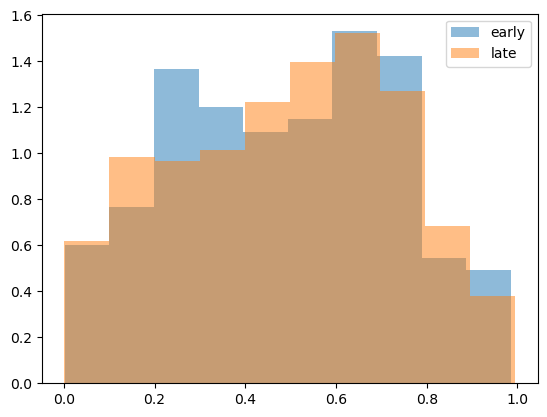

In [70]:
# for each bin of peaks, plot the histogram of pseudotimes
plt.clf()
peak_remap = {0.2: 0, 0.4: 0, 0.8: 1, 0.9: 1}
for p in [0, 1]:
    pseudotimes = []
    for (gene_name, antibody), img_stats in prot_img_stats.items():
        if not gene_name in cc_paper_prot_peaks:
            continue
        if peak_remap[cc_paper_prot_peaks[gene_name]] != p:
            continue
        pseudotimes.extend(img_stats["pseudotime"])
    plt.hist(pseudotimes, bins=10, label=f"{'early' if p == 0 else 'late'}", alpha=0.5, density=True)
plt.legend()
plt.show()

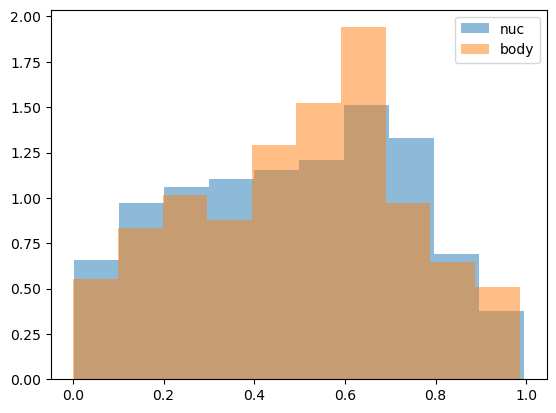

In [71]:
# do the same but based on the location
plt.clf()
loc_remap = {"nuc": 0, "cyto": 1, "cell": 1}
for p in [0, 1]:
    pseudotimes = []
    for (gene_name, antibody), img_stats in prot_img_stats.items():
        if not gene_name in cc_paper_prot_loc:
            continue
        if loc_remap[cc_paper_prot_loc[gene_name]] != p:
            continue
        pseudotimes.extend(img_stats["pseudotime"])
    plt.hist(pseudotimes, bins=10, label=f"{'nuc' if p == 0 else 'body'}", alpha=0.5, density=True)
plt.legend()
plt.show()

In [72]:
prot_ant_int_ps = pkl.load(open(DATA_DIR / f"prot_ant_ps_stats_{checkpoint_hash}.pkl", "rb"))

image_paths, cell_mask_paths, nuc_mask_paths = load_index_paths(FUCCI_DATA_DIR / f"index_{FUCCI_NAME}.csv")
cell_masks = torch.cat([torch.load(path) for path in cell_mask_paths])
nuc_masks = torch.cat([torch.load(path) for path in nuc_mask_paths])

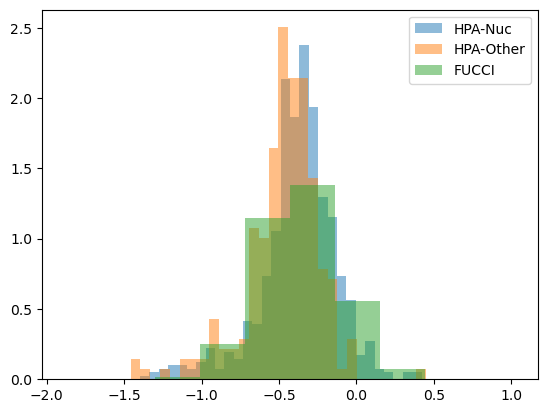

In [73]:

# plot the distribution of nuclear size by location
plt.clf()
loc_remap = {"nuc": 0, "cyto": 1, "cell": 1}
for p in [0, 1]:
    nuc_cyto_ratio = []
    for (gene_name, antibody), img_stats in prot_img_stats.items():
        if not gene_name in cc_paper_prot_loc:
            continue
        if loc_remap[cc_paper_prot_loc[gene_name]] != p:
            continue
        # pseudotimes.extend(prot_ant_int_ps[(gene_name, antibody)]["nuc_pixel_cts"])
        # pseudotimes.extend(prot_ant_int_ps[(gene_name, antibody)]["non_zero_cts"])
        nuc = prot_ant_int_ps[(gene_name, antibody)]["nuc_pixel_cts"]
        non_zero = prot_ant_int_ps[(gene_name, antibody)]["non_zero_cts"]
        cyto = non_zero - nuc
        nuc_cyto_ratio.extend(nuc / cyto)
    nuc_cyto_ratio = torch.cat(nuc_cyto_ratio).numpy()
    nuc_cyto_ratio = np.log10(nuc_cyto_ratio)
    plt.hist(nuc_cyto_ratio, bins=30, label=f"{'HPA-Nuc' if p == 0 else 'HPA-Other'}", alpha=0.5, density=True)

mask_nuc_size = torch.sum(nuc_masks, dim=(1, 2))
mask_cyto_size = torch.sum(cell_masks, dim=(1, 2)) - mask_nuc_size
mask_nuc_cyto_ratio = mask_nuc_size / mask_cyto_size
mask_nuc_cyto_ratio = np.log10(mask_nuc_cyto_ratio)

plt.hist(mask_nuc_cyto_ratio, bins=10, label="FUCCI", alpha=0.5, density=True)

plt.legend()
plt.show()

<Figure size 640x480 with 0 Axes>

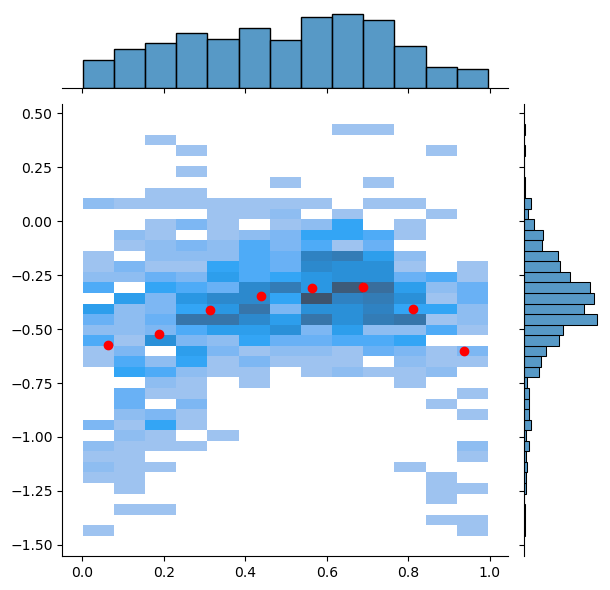

In [85]:
# plot the distribution of pseudotime and nuclear/cytoplasmic size
plt.clf()
nuc_cyto_ratio = []
pseudotimes = []
for (gene_name, antibody), stats in prot_img_stats.items():
    nuc = prot_ant_int_ps[(gene_name, antibody)]["nuc_pixel_cts"]
    non_zero = prot_ant_int_ps[(gene_name, antibody)]["non_zero_cts"]
    cyto = non_zero - nuc
    nuc_cyto_ratio.extend(nuc / cyto)
    pseudotimes.extend(stats["pseudotime"])
nuc_cyto_ratio = torch.cat(nuc_cyto_ratio).numpy()
nuc_cyto_ratio = np.log10(nuc_cyto_ratio)
pseudotimes = np.array(pseudotimes)

# plt.scatter(pseudotimes, nuc_cyto_ratio, alpha=0.1)
sns.jointplot(x=pseudotimes, y=nuc_cyto_ratio, kind="hist")

# find the average nuclear/cytoplasmic size for each pseudotime bin and plot
bins = np.linspace(0, 1, 9)
pseudotime_binned = np.digitize(pseudotimes, bins) - 1
average_nuc_cyto_ratio = [nuc_cyto_ratio[pseudotime_binned == i].mean() for i in range(len(bins) - 1)]


plt.scatter(bins[:-1] + (bins[1:] - bins[:-1]) / 2, average_nuc_cyto_ratio, color="red")
plt.show()

In [75]:
cls_tokens = torch.load(DATA_DIR / f"ref_cls_tokens_{checkpoint_hash}.pt")
pseudotimes = torch.load(DATA_DIR / f"pseudotimes_{checkpoint_hash}.pt").cpu()
print(cls_tokens.shape, pseudotimes.shape)
image_percentiles = cls_tokens[:, -2 * 64:]
cls_tokens = cls_tokens[:, :-2 * 64]
print(cls_tokens.shape, image_percentiles.shape, pseudotimes.shape)
print(cls_tokens.dtype, image_percentiles.dtype, pseudotimes.dtype)

torch.Size([893, 1664]) torch.Size([893, 1])
torch.Size([893, 1536]) torch.Size([893, 128]) torch.Size([893, 1])
torch.float64 torch.float64 torch.float64


[0.5384163  0.25599725 0.0974297 ]


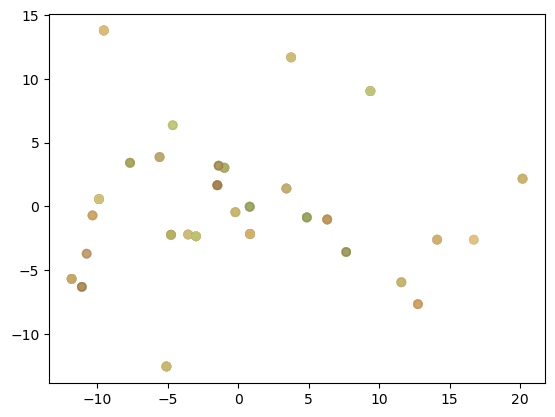

In [76]:
# PCA of the image_percentiles
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

pca = PCA(n_components=3)
scaled_percentiles = StandardScaler().fit_transform(image_percentiles)
pca_percentiles = pca.fit_transform(scaled_percentiles)

print(pca.explained_variance_ratio_)

plt.scatter(pca_percentiles[:, 0], pca_percentiles[:, 1], c=pseudotimes, alpha=0.1, cmap="RdYlGn")
plt.show()

/home/ishang/miniconda3/envs/implicit/lib/python3.10/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/ishang/miniconda3/envs/implicit/lib/python3.10/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/ishang/miniconda3/envs/implicit/lib/python3.10/site-packag

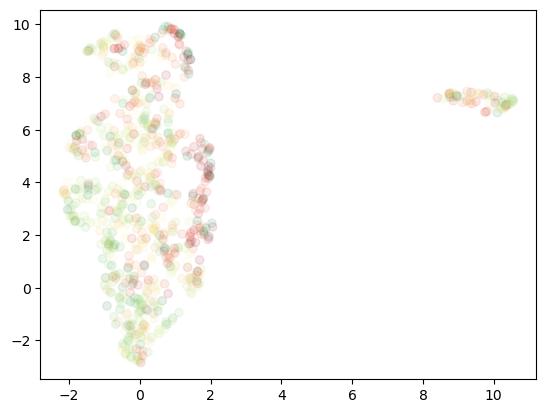

In [77]:
# umap of cls tokens colored by pseudotime
import umap

reducer = umap.UMAP()
combined_input = torch.cat([cls_tokens, image_percentiles], dim=1)
umap_cls_tokens = reducer.fit_transform(combined_input)

plt.clf()
plt.scatter(umap_cls_tokens[:, 0], umap_cls_tokens[:, 1], c=pseudotimes, cmap="RdYlGn", alpha=0.1)
plt.show()

[0.39172909 0.14334147 0.09931612 0.07542743 0.04932085 0.03627249
 0.02593033 0.01940943 0.01420305 0.01283966]


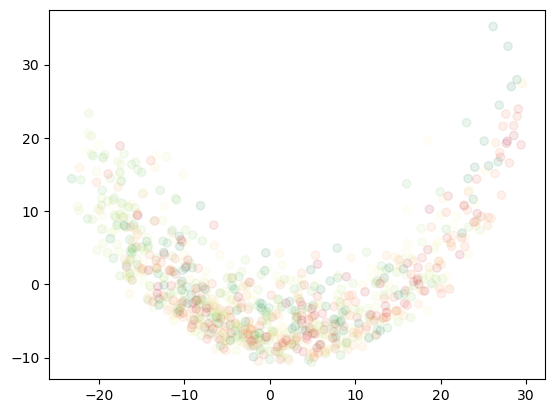

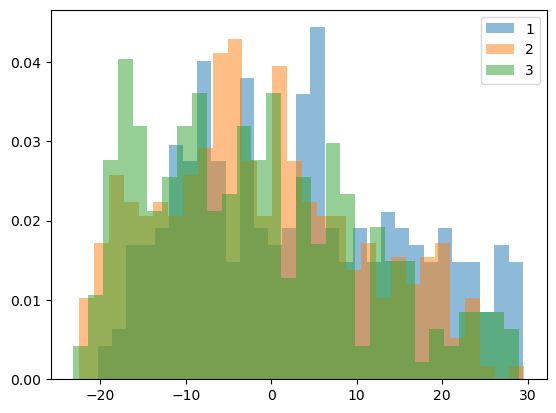

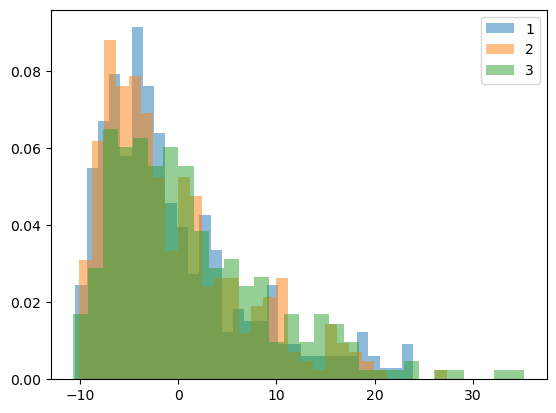

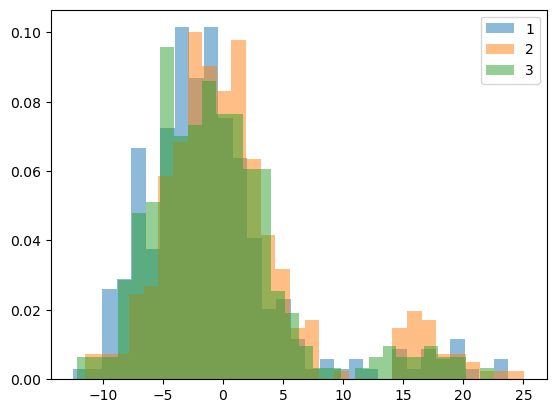

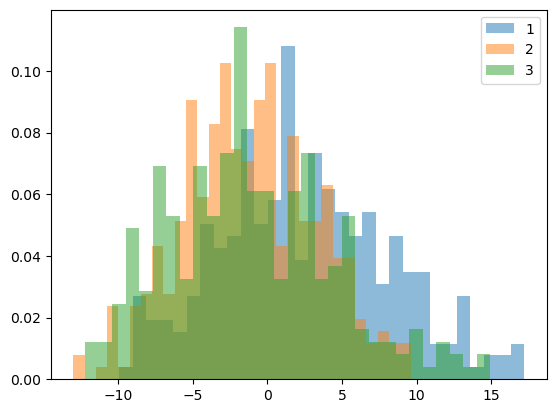

In [78]:
# pca of cls_tokens
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

pca = PCA(n_components=10)
cls_tokens_scaled = StandardScaler().fit_transform(cls_tokens)
principal_components = pca.fit_transform(cls_tokens)

bins = [0, 0.33, 0.66, 1]
pseudotimes_binned = np.digitize(pseudotimes, bins)

print(pca.explained_variance_ratio_)

plt.clf()
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=pseudotimes, alpha=0.1, cmap="RdYlGn")
plt.show()

for pc in range(4):
    plt.clf()
    for b in range(1, 4):
        plt.hist(principal_components[pseudotimes_binned.flatten() == b, pc], bins=30, label=f"{b}", alpha=0.5, density=True)
    plt.legend()
    plt.show()

/home/ishang/miniconda3/envs/implicit/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


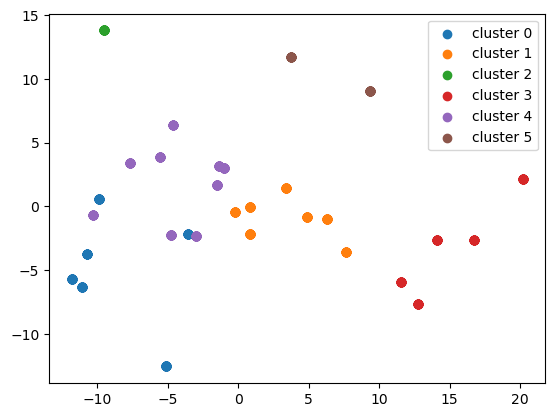

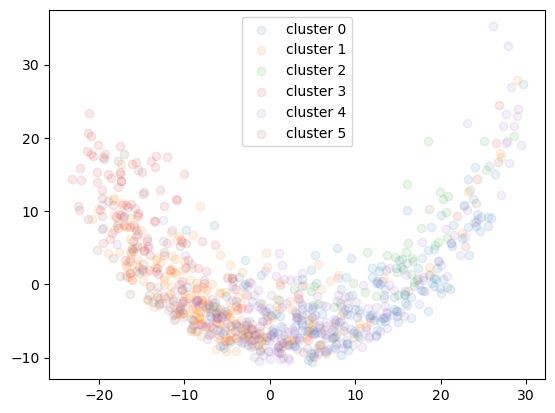

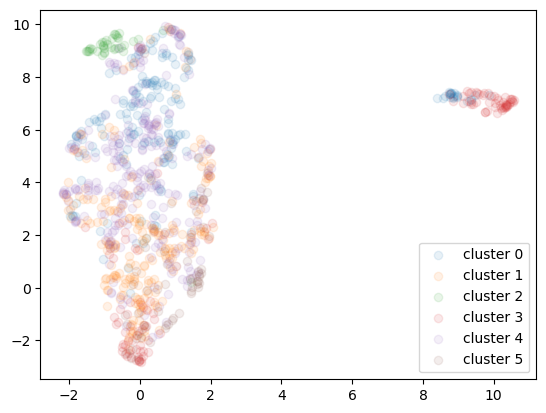

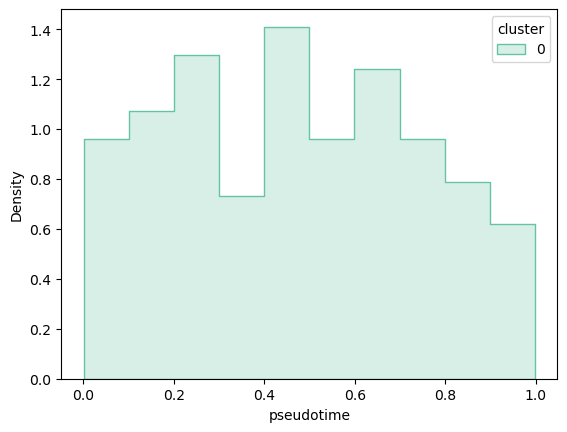

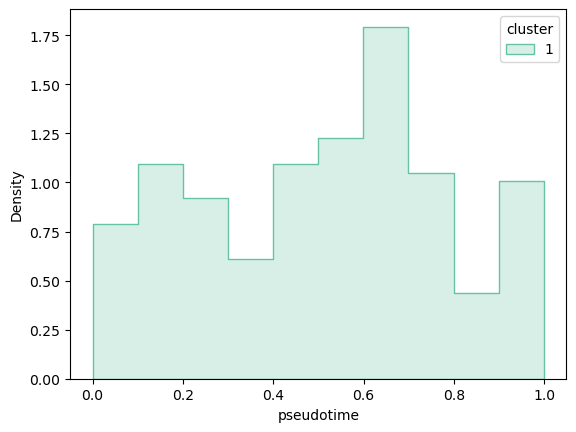

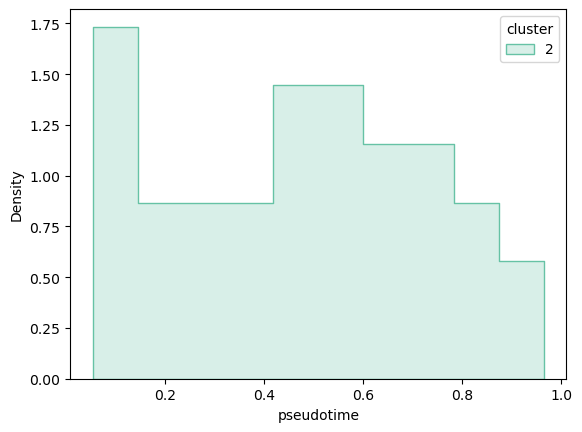

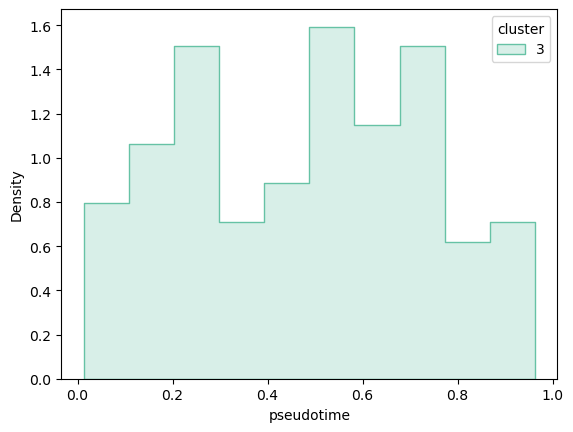

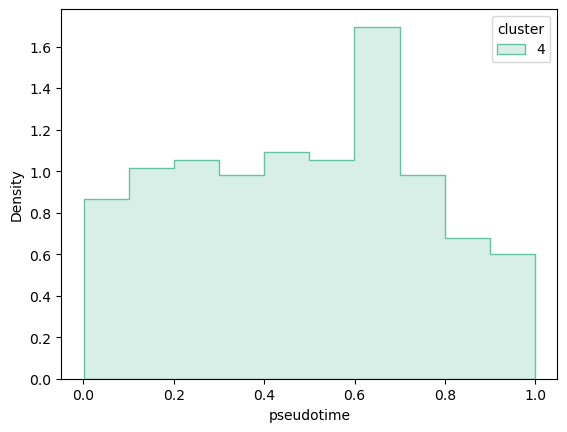

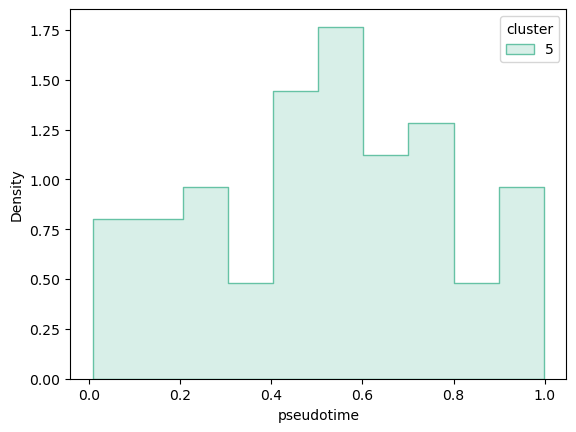

In [79]:
# cluster the umap_cls_tokens into 2 groups and plot the pseudotime distribution
from sklearn.cluster import KMeans

n_clusters = 6

kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(pca_percentiles)
cluster_labels = kmeans.labels_

plt.clf()
for i in range(n_clusters):
    plt.scatter(pca_percentiles[cluster_labels == i, 0], pca_percentiles[cluster_labels == i, 1], label=f"cluster {i}")
plt.legend()
plt.show()

plt.clf()
for i in range(n_clusters):
    plt.scatter(principal_components[cluster_labels == i, 0], principal_components[cluster_labels == i, 1], alpha=0.1, label=f"cluster {i}")
plt.legend()
plt.show()

plt.clf()
for i in range(n_clusters):
    plt.scatter(umap_cls_tokens[cluster_labels == i, 0], umap_cls_tokens[cluster_labels == i, 1], alpha=0.1, label=f"cluster {i}")
plt.legend()
plt.show()

df = pd.DataFrame({"pseudotime": pseudotimes.flatten(), "cluster": cluster_labels})
for i in range(n_clusters):
    plt.clf()
    sns.histplot(data=df[df["cluster"] == i], x="pseudotime", hue="cluster", bins=10, stat="density", element="step", palette="Set2", common_norm=False)
    plt.show()

# Checking Model Ensembling as a Solution

893 893


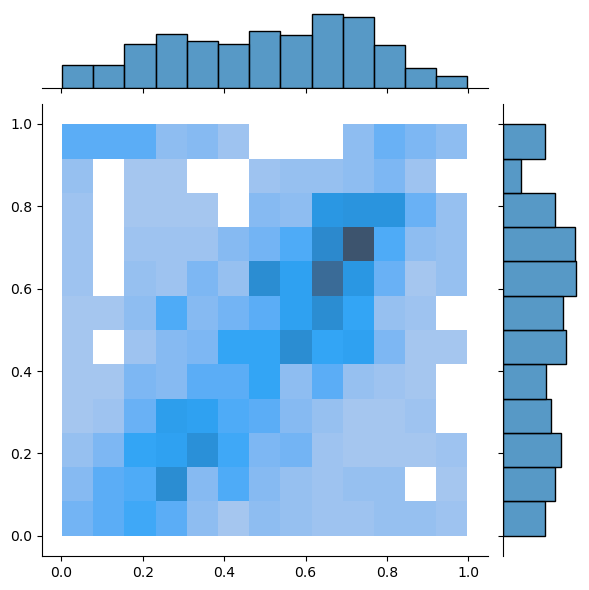

In [36]:
checkpoint_hash_1 = "vvepu5m7"
# from the hpa_cc notebook TODO: move these calculations to utils and just manage caching/loading there 
prot_img_stats_1 = pkl.load(open(DATA_DIR / f"prot_img_stats_{checkpoint_hash_1}.pkl", "rb"))

pseudotimes = []
for (gene_name, antibody), img_stats in prot_img_stats_1.items():
    pseudotimes.extend(img_stats["pseudotime"])
model_1_hpa_pseudotimes = np.array(pseudotimes)

checkpoint_hash_2 = "wwzdewqp"
# from the hpa_cc notebook TODO: move these calculations to utils and just manage caching/loading there 
prot_img_stats_2 = pkl.load(open(DATA_DIR / f"prot_img_stats_{checkpoint_hash_2}.pkl", "rb"))

pseudotimes = []
for (gene_name, antibody), img_stats in prot_img_stats_2.items():
    pseudotimes.extend(img_stats["pseudotime"])
model_2_hpa_pseudotimes = np.array(pseudotimes)

print(len(model_1_hpa_pseudotimes), len(model_2_hpa_pseudotimes))

sns.jointplot(x=model_1_hpa_pseudotimes, y=model_2_hpa_pseudotimes, kind="hist")

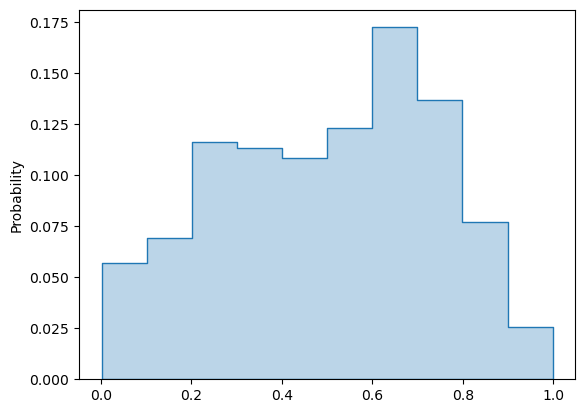

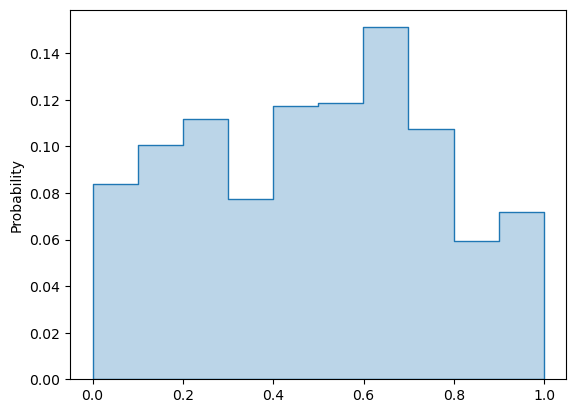

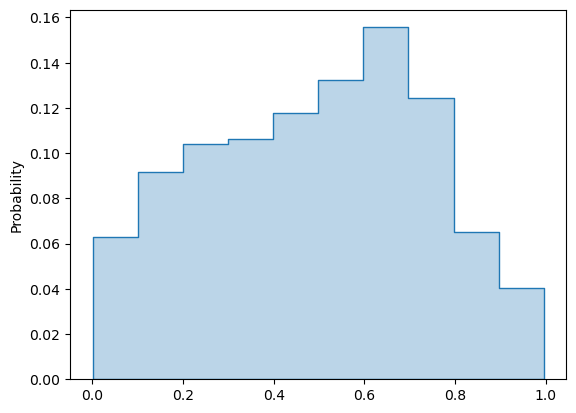

In [37]:
# plot the histogram of the averaged pseudotimes
plt.clf()
sns.histplot(model_1_hpa_pseudotimes, bins=10, stat="probability", label=f"Model 1", element="step", alpha= 0.3)
plt.show()
plt.clf()
sns.histplot(model_2_hpa_pseudotimes, bins=10, stat="probability", label=f"Model 2", element="step", alpha= 0.3)
plt.show()
plt.clf()
average = (model_1_hpa_pseudotimes + model_2_hpa_pseudotimes) / 2
m1 = np.where(model_1_hpa_pseudotimes < model_2_hpa_pseudotimes, model_1_hpa_pseudotimes, model_2_hpa_pseudotimes) # smaller
m2 = np.where(model_1_hpa_pseudotimes < model_2_hpa_pseudotimes, model_2_hpa_pseudotimes, model_1_hpa_pseudotimes) # larger
average = np.where(
    (m2 - m1) < 0.5, (m1 + m2) / 2, ((m1 + 1.0 + m2) / 2) % 1.0
)
sns.histplot(average, bins=10, stat="probability", label=f"Average", element="step", alpha= 0.3)
plt.show()

In [38]:
from copy import deepcopy
prot_img_stats = {}
with open(DATA_DIR / f"prot_img_stats_{checkpoint_hash_1}_{checkpoint_hash_2}.pkl", "wb") as f:
    for (gene_name, antibody), stats in prot_img_stats_1.items():
        prot_img_stats[(gene_name, antibody)] = deepcopy(stats)
        pseudo_1 = stats["pseudotime"]
        pseudo_2 = prot_img_stats_2[(gene_name, antibody)]["pseudotime"]
        ps1 = np.where(pseudo_1 < pseudo_2, pseudo_1, pseudo_2)
        ps2 = np.where(pseudo_1 < pseudo_2, pseudo_2, pseudo_1)
        ps_avg = np.where(
            (ps2 - ps1) < 0.5, (ps1 + ps2) / 2, ((ps1 + 1.0 + ps2) / 2) % 1.0
        )
        prot_img_stats[(gene_name, antibody)]["pseudotime"] = ps_avg
    print(len(prot_img_stats))
    print(len(prot_img_stats_1))
    print(len(prot_img_stats_2))
    print(prot_img_stats[list(prot_img_stats.keys())[0]]["pseudotime"])
    pkl.dump(prot_img_stats, f)

30
30
30
[0.18 0.69 0.91 0.24 0.36 0.61 0.79 0.65 0.52 0.82 0.39 0.1  0.65 0.23
 0.   0.73 0.34 0.49 0.44 0.42 0.72 0.62 0.46 0.64 0.14]
